# **Análisis Cluster**
El análisis cluster, o análisis de conglomerados, es una técnica estadística multivariante, cuyo objetivo es agrupar los elementos o variables análizadas en distintos grupos (clusters) en función de la homogeneidad existente entre ellas. 

En este caso nos vamos a centrar en el **método jerárquico**. Este método puede ser aglomerativo o divisivo, dependiendo si partimos de cluster individuales que se van conbinando y que convergen en uno solo o divisivo si es de forma opuesta. 

La gran diferencia con el método K-means es que este no requiere que se especifique de forma previa con cuantos cluster queremos contar. 

Para llevar a cabo nuestro ejemplo, escogeremos el dataset **ecv_cluster**, elaborado a partir de los datos publicados por el INE.

## **Jerárquico**

Cargamos las librerias que vamos a utilizar en el modelo.

In [1]:
# Preparación de los datos 
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
# Modelado 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
# Visualización
import matplotlib.pyplot as plt


Subimos a Colab el archivo que vamos a utilizar, en nuestro caso es **ecv_cluster**.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ecv_cluster.xlsx to ecv_cluster.xlsx


Visualizamos los datos del archivo que acabamos de cargar.

In [3]:
datos=pd.read_excel('ecv_cluster.xlsx')
datos.head()

,ccaa,taspobex,taspob,tascar,tasvivtrab
0,Andalucía,35.1,28.5,8.0,13.5
1,Aragón,18.5,16.0,1.7,6.1
2,"Asturias, Principado de",27.7,22.2,4.5,17.8
3,"Balears, Illes",22.0,14.1,6.9,4.5
4,Canarias,36.3,29.9,10.7,15.3


Creamos las diferentes variables que vamos a utilizar. En este caso, en la variable columnas, seleccionaremos la tasa de riesgo de pobreza o exclusión social (indicador AROPE) y la tasa de carencia material severa. Después, la lista que acabamos de crear, la convertimos en un DataFrame (resultado). Además, también tenemos nuestra serie con las comunidades autónomas. 

In [4]:
columnas = ["taspobex", "tascar"]
resultado = datos[columnas]
comunidades = datos["ccaa"]

### **Dendrograma**
Para representar gráficamente nuestro modelo, escogeremos una tipología como la del dendrograma, ya que nos permitirá observar los dintintos cluster que se han formado, las relaciones entre las diferentes variables y la distancia entre unas y otras. 

Además, en nuestro caso seleccionaremos que las variables se situen a la izquierda, es decir, situaremos el dendrograma a la derecha, para que podamos leer las variables sin ningún tipo de problema. 

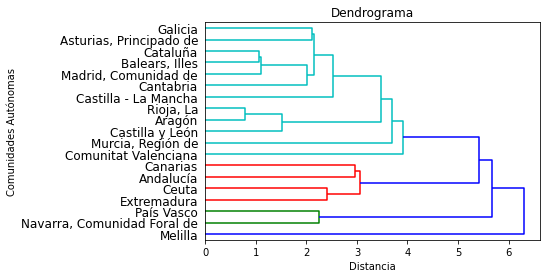

In [5]:
W = hierarchy.linkage(resultado, 'single')
dendrograma = sch.dendrogram(W,labels=np.array(comunidades),orientation='right')

plt.title('Dendrograma')
plt.xlabel('Distancia')
plt.ylabel('Comunidades Autónomas')
plt.show()


### **Matriz de distancias**
Para ver numéricamente la distancia entre nuestras variables (CCAA), realizamos la matriz de distancias, la cual nos muestra la distancia euclídea entre los puntos analizados, siendo una matriz *n x n*.

Inicialmente tenemos el vector con las distancias entre los datos analizados, a través de **pdist( )**. Posteriormente, **squareform( )** convierte el vector de distancia en una matriz de distancia. Por último, contruimos nuestra matriz. 

In [6]:
dist=pdist(resultado)  

DIST=squareform(dist) 

df=pd.DataFrame(DIST,index=comunidades,columns=comunidades) 
pd.set_option('precision',1)
df.head()

ccaa,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La",Ceuta,Melilla
ccaa,,,,,,,,,,,,,,,,,,,
Andalucía,0.0,17.8,8.2,13.1,3.0,12.0,15.9,7.2,12.4,6.8,3.7,9.8,14.2,5.4,23.2,21.4,17.1,4.0,9.4
Aragón,17.8,0.0,9.6,6.3,19.9,5.9,2.3,11.4,6.2,14.6,21.4,8.0,5.7,12.7,7.9,5.7,0.8,20.8,26.8
"Asturias, Principado de",8.2,9.6,0.0,6.2,10.6,4.0,8.0,2.5,5.2,7.2,11.8,2.1,7.2,3.7,15.8,13.8,9.0,11.3,17.4
"Balears, Illes",13.1,6.3,6.2,0.0,14.8,3.0,4.0,8.7,1.1,8.6,16.8,4.1,1.1,7.7,10.0,8.3,5.5,16.8,21.6
Canarias,3.0,19.9,10.6,14.8,0.0,14.1,18.0,10.0,14.2,7.0,3.1,11.9,15.9,7.3,24.7,23.1,19.2,5.0,6.9


Vamos a asignar los cluster a las CCAA.

t es la altura donde queremos realizar el corte en nuestro dendrograma.

Y le decimos que aplique un criterio de distancia

In [7]:
clusters = fcluster(W, t=4, criterion='distance')
clusters

array([2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 1, 3, 2, 4],
      dtype=int32)

In [8]:
clusters_ccaa=pd.concat([comunidades,pd.DataFrame(clusters)],axis=1)
clusters_ccaa.rename(columns={"ccaa":"Comunidades Autónomas",0:"Cluster"},inplace=True)
clusters_ccaa

,Comunidades Autónomas,Cluster
0,Andalucía,2
1,Aragón,3
2,"Asturias, Principado de",3
3,"Balears, Illes",3
4,Canarias,2
5,Cantabria,3
6,Castilla y León,3
7,Castilla - La Mancha,3
8,Cataluña,3
9,Comunitat Valenciana,3


Utilizamos las función AgglomerativeClustering() para fusionar nuestros cluster. Creamos y_means que será un array des ajuste predictorio de nuestro ejemplo y otro array que será resultado. 

In [17]:
hc = AgglomerativeClustering(n_clusters = 4, 
                    affinity = 'euclidean', 
                    linkage = 'ward')

y_means = hc.fit_predict(resultado)
resultado = np.array(resultado)

Vamos a plasmar gráficamente la situación de los puntos en el plano. Lo primero que haremos será definir nuestra función a plasmar, en este caso situación. Después, utilizaremos la función ax.text( ) para que salgan los nombres de las CCAA, así como ax.set_xlim y ax.set_ylim para decirles en que puntos se mueven nuestros ejes. Por último, fig.set_figheight( ) y fig.set_figwidth( ) nos proporcionan la altura y anchura de nuestro gráfico respectivamente. 


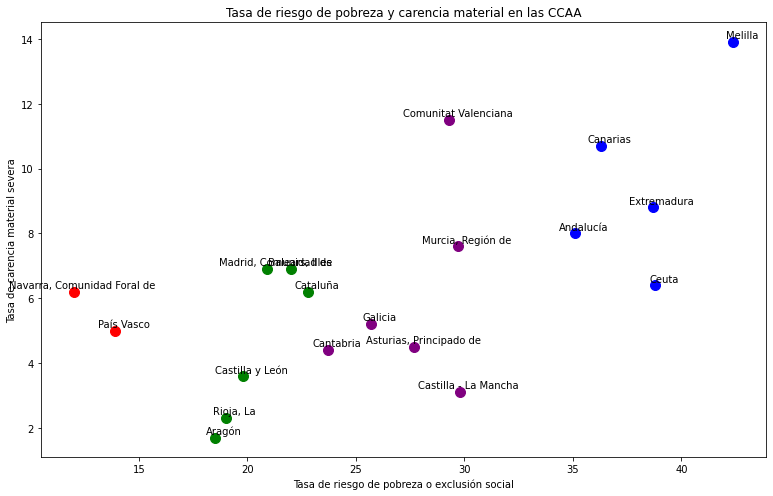

In [15]:
def situacion(x,y,z):
    fig, ax = plt.subplots()
    for i in range(19):       
      ax.text(x[i]+0.4,y[i]+0.2, z[i], color = 'black', ha = 'center', va = 'center') 
    ax.set_title('Tasa de riesgo de pobreza y carencia material en las CCAA')
    ax.set_xlabel('Tasa de riesgo de pobreza o exclusión social')
    ax.set_ylabel('Tasa de carencia material severa')
    fig.set_figheight(8)
    fig.set_figwidth(13)
    fig.show()
    plt.scatter(resultado[y_means==0,0],resultado[y_means==0,1],s=100, c='purple',label='Cluster1')
    plt.scatter(resultado[y_means==1,0],resultado[y_means==1,1],s=100, c='blue',label='Cluster2')
    plt.scatter(resultado[y_means==2,0],resultado[y_means==2,1],s=100, c='green',label='Cluster3')
    plt.scatter(resultado[y_means==3,0],resultado[y_means==3,1],s=100, c='red',label='Cluster4')

situacion(resultado[:,0],resultado[:,1],comunidades)